# How To: Accessing Raw Simulation Results

As we saw in the model checking section, you may obtain the raw simulation results rather than the plot. To activate this feature, use the ``return_df`` flag and set it to ``True``.
The following cell obtains these and stores the values in a variable "df". This way you are able to work with the data outside ``BPTK_Py``!

In [4]:
from BPTK_Py.bptk import bptk
bptk = bptk()

In [5]:
df = bptk.plot_scenarios(
    scenario_managers=["smSimpleProjectManagement"],
    scenarios=["scenario120"], 
    equations=["openTasks"],
    title="Deadline changes\n",
    x_label="Time",start_date="1/1/2018",freq="M",
    y_label="Marketing Budget (USD)",
    kind="line",
    return_df=True ## <--- HERE
    ,series_names = {"smSimpleProjectManagement_scenario120_openTasks" : "openTasks"}
    )

You may want to learn a little about the data. The following code calls the ``head()`` and ``describe()`` functions of the dataFrame. Head return the first 5 elements and Describe gives some important information on the data.
For instance, we learn that there are 121 elements in the dataFrame ("count"). This is correct as the model simulates from t=0 to t=120. Further values are the mean, standard deviation, min, max and the 25th / 50th and 75th percentile.

In [6]:
print("***************************")
print("Properties of the dataFrame")
print("\t first 5 elements:")
print(df.head())
print("")
print("Main description of the dataFrame")
print(df.describe())

***************************
Properties of the dataFrame
	 first 5 elements:
             openTasks
2018-01-31  120.000000
2018-02-28  118.904800
2018-03-31  117.809096
2018-04-30  116.712881
2018-05-31  115.616145

Main description of the dataFrame
        openTasks
count  121.000000
mean    53.582193
std     38.468884
min      0.000000
25%     18.411872
50%     53.185085
75%     86.886076
max    120.000000



To select only certain periods, you may use two different approaches. 
1. Go by t and use the list index representation
2. Go by date (if you created a time series using ``start_date``)

In both cases, you need to supply square brackets and the selected range:

In [7]:
# Select 06 first months
by_index = df[0:6] 

# Select all values of the months January to June 2018:
by_year = df["2018-01":"2018-06"]

print("BY INDEX")
print(by_index)

print("")
print("BY YEAR-MONTH:")
print(by_year)

print("")
print("CHECK FOR EQUALITY OF BOTH")
print(by_index == by_year)

BY INDEX
             openTasks
2018-01-31  120.000000
2018-02-28  118.904800
2018-03-31  117.809096
2018-04-30  116.712881
2018-05-31  115.616145
2018-06-30  114.518882

BY YEAR-MONTH:
             openTasks
2018-01-31  120.000000
2018-02-28  118.904800
2018-03-31  117.809096
2018-04-30  116.712881
2018-05-31  115.616145
2018-06-30  114.518882

CHECK FOR EQUALITY OF BOTH
            openTasks
2018-01-31       True
2018-02-28       True
2018-03-31       True
2018-04-30       True
2018-05-31       True
2018-06-30       True


Now you even saw how easy it was to check for value equality, just issue ``by_index == by_year``. The return type is a ``Series`` again and you may use it for further computations if assigned to a variable.
Let us now simulate the equation "closedTasks" and generate a second dataFrame for and append it to the existing dataFrame:

In [8]:
df_closed = bptk.plot_scenarios(
    scenario_managers=["smSimpleProjectManagement"],
    scenarios=["scenario120"], 
    equations=["closedTasks"],
    title="Deadline changes\n",
    x_label="Time",start_date="1/1/2018",freq="M",
    y_label="Tasks",
    kind="line",
    return_df=True,
    series_names= {"smSimpleProjectManagement_scenario120_closedTasks":"closedTasks"}
    )


df["closedTasks"] = df_closed["closedTasks"]

You see how easy it was to add the series "closedTasks" of ``df_closed`` to ``df``. Similarly, we may create new series using computation:

In [9]:
df["initialOpenTasks"] = df["openTasks"] + df["closedTasks"]
print(df["initialOpenTasks"].head())

2018-01-31    120.0
2018-02-28    120.0
2018-03-31    120.0
2018-04-30    120.0
2018-05-31    120.0
Freq: M, Name: initialOpenTasks, dtype: float64


As you see, the DataFrame makes sure to make an addition for each value of the series.
Every value should now be 120, just like the initial number of tasks of the scenario ``scenario120``.
As a last example, let us now compute the percentage of tasks closed:

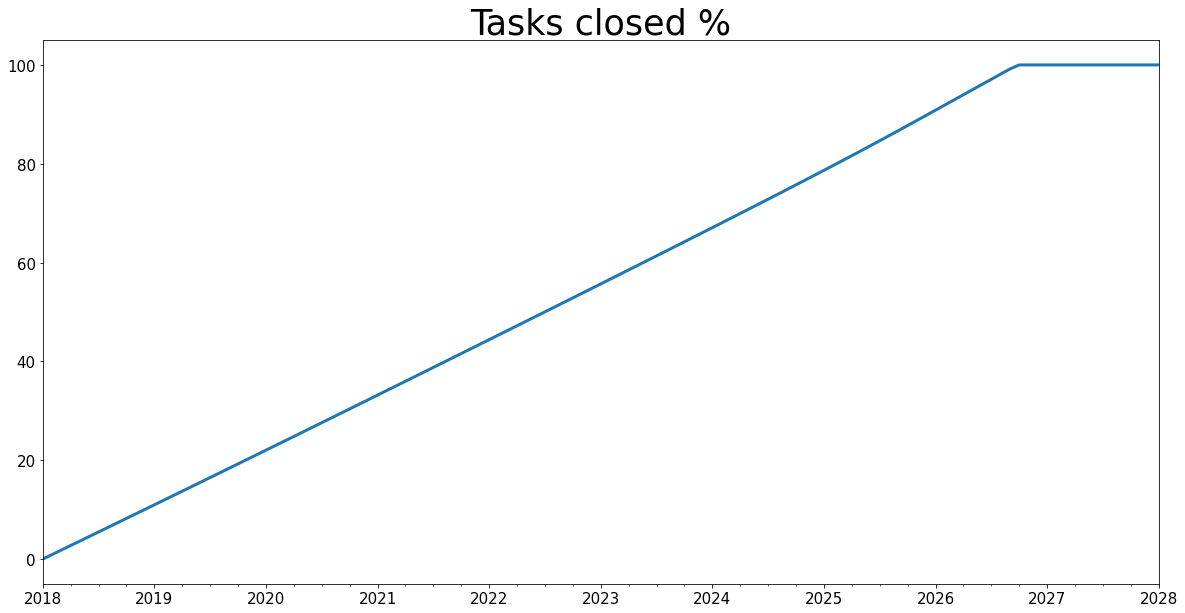

In [10]:
df["Percent Tasks Closed"] = df["closedTasks"] / df["initialOpenTasks"] * 100

### and plot it:
plt=df["Percent Tasks Closed"].plot(title="Tasks closed %",figsize=(20,10))